# ヒートポンプに関する可視化

In [2]:
# データ分析に必要なライブラリ
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.family'] = 'IPAPGothic'

In [3]:
# データ確認
vis_df = pd.read_csv(r'use_data/heatpump_data.csv',
                     index_col=0,
                     engine='python',
                     parse_dates=[0],
                     header=0,
                     skiprows=[1]
                    )

In [4]:
vis_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2017-04-01 00:00:00 to NaT
Data columns (total 5 columns):
外気温                  8760 non-null float64
GHP-1     ｶﾞｽ量       21654 non-null float64
GHP-1     1F 室内温度    21654 non-null float64
GHP-1     ｶﾞｽ消費率     21654 non-null float64
GHP-1     1F 運転状態    21654 non-null float64
dtypes: float64(5)
memory usage: 1.6 MB


In [5]:
vis_df.head()

,外気温,GHP-1 ｶﾞｽ量,GHP-1 1F 室内温度,GHP-1 ｶﾞｽ消費率,GHP-1 1F 運転状態
ポイント名,,,,,
2017-04-01 00:00:00,5.8,0.0,21.5,0.0,0.0
2017-04-01 01:00:00,5.7,0.0,21.0,0.0,0.0
2017-04-01 02:00:00,5.8,0.0,21.0,0.0,0.0
2017-04-01 03:00:00,5.9,0.0,20.5,0.0,0.0
2017-04-01 04:00:00,5.9,0.0,20.5,0.0,0.0


## ヒートポンプ運転状況の把握

## 月別で可視化

In [12]:
# 月別データにリサンプリングする。
# ガス量は計量値なので月毎の合計値で可視化する。
vis_df_month = vis_df.resample('M').sum()
vis_df_month['外気温'] = vis_df['外気温'].resample('M').mean()
vis_df_month['GHP-1     1F 室内温度'] = vis_df['GHP-1     1F 室内温度'].resample('M').mean()
vis_df_month['GHP-1     ｶﾞｽ消費率'] = vis_df['GHP-1     ｶﾞｽ消費率'].resample('M').mean()

# 日付のタイムスタンプを yyyy/mm/dd hh:mm:ss から　yyyy/mmに変更
vis_df_month.index = vis_df_month.index.strftime('%Y/%m')

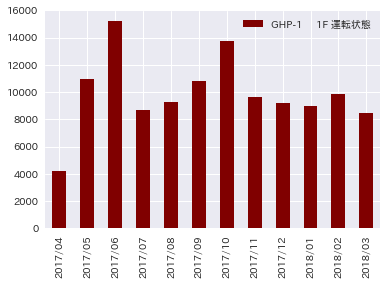

In [38]:
vis_df_month.plot(y='GHP-1     1F 運転状態',kind='bar',colormap='jet_r')

C:\Users\nishi\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


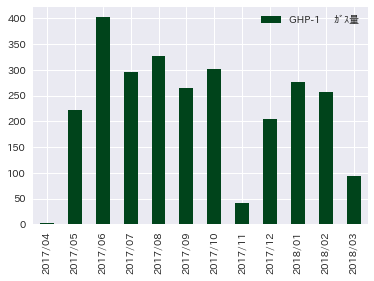

In [51]:
vis_df_month.plot(y=vis_df_month.columns[vis_df_month.columns.str.contains('ｶﾞｽ量')],kind='bar',colormap='Greens_r')

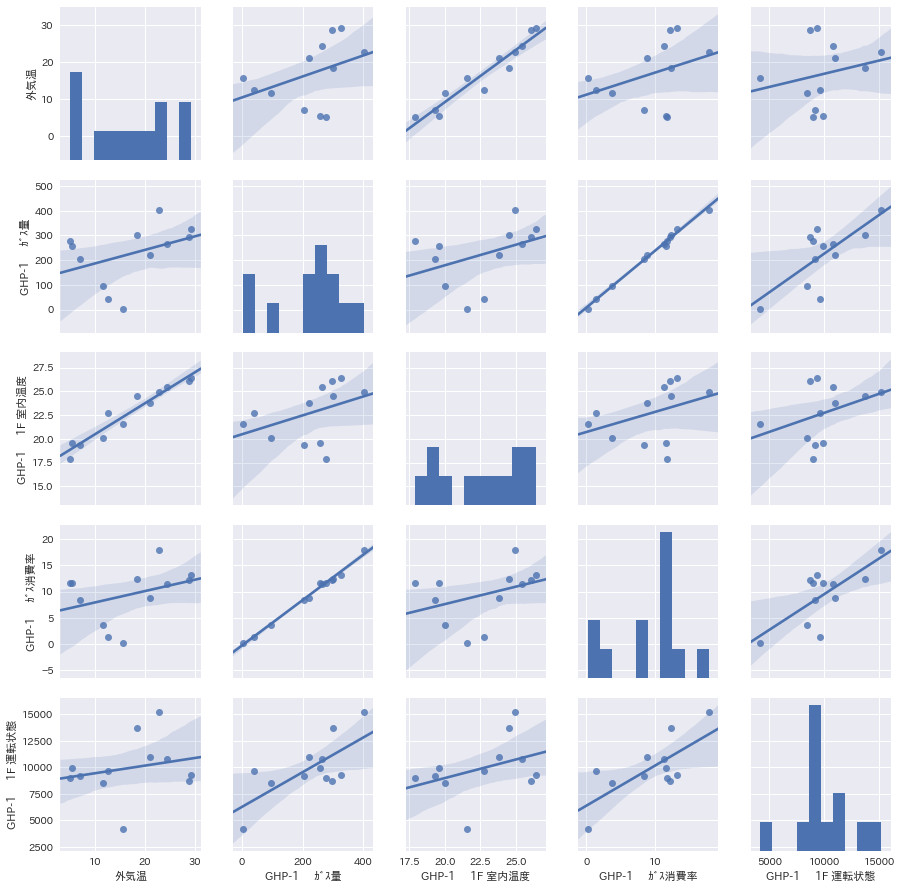

In [54]:
sns.pairplot(vis_df_month,kind='reg')